In [1]:
# Importing all the required Libraries
import os
import pandas as pd
import numpy as np

# Data Visualization libraries
from pandas.plotting import scatter_matrix
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Evaluation Metrics
import evaluation

# Deep learning models libraries
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Input, Flatten, Conv2D, MaxPooling2D, SimpleRNN
from tensorflow.keras.optimizers import Adam

In [2]:
# Loading the train and test datasets with labels
train_data = pd.read_csv("proData/train_data.csv")
test_data = pd.read_csv("proData/test_data.csv")
train_labels = pd.read_csv("proData/train_labels.csv")
test_labels = pd.read_csv("proData/test_labels.csv")

In [3]:
# Selecting the best features from the saved dataframes [Total 8]
Features = ["htn", "dm", "bgr", "appet", "sod", "sg", "pcv", "hemo"]

### Ensemble Learning models

Training the machine learning models on the features only datasets for performing ensemble learning

In [4]:
# Fit logistic regression model
model_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
model_lr.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [5]:
# Fit Gaussian Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [6]:
# Fit Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(train_data[Features], train_labels)

DecisionTreeClassifier(random_state=42)

In [7]:
# Fit Support Vector Machine Classifier (SVM) model
model_svm = SVC(kernel='linear', C=1, random_state=42, probability=True)
model_svm.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear', probability=True, random_state=42)

In [8]:
# Fit K-Nearest Neighbors model
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [9]:
em_names = ['rf', 'bagging', 'xgb', 'ada', 'cb', 'gb', 'stacking', "vh", "vs", "blend"]
lem_names = ['RF', 'Bagging','XGBoost', 'Adaboost', 'Catboost', 'GradientBoost', 'Stacking', "Voting Hard", "Voting Soft", "Blending"]

cem_names = ['darkgreen', 'maroon', 'mediumblue', 'goldenrod', 'fuchsia', 'saddlebrown', 'teal', "cyan", "red", "yellow"]

# Create a list of the models to be ensembled
em_models = [('lr', model_lr), ('nb', model_nb), ('dt', model_dt), ('svm', model_svm), ('knn', model_knn)]

In [10]:
# Fit Random forest model
model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model_rf.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=3, random_state=42)

In [11]:
# Aggregate the predictions made by each BaggingClassifier
y_preds = []
for name, model in em_models:
    # Create a BaggingClassifier object for the current model
    bagging_model = BaggingClassifier(model, n_estimators=10, max_samples=0.8, random_state=42)
    
    # Train the BaggingClassifier on the training set
    bagging_model.fit(train_data[Features], train_labels)

    # Make predictions on the testing set
    y_pred = bagging_model.predict_proba(test_data[Features])[:, 1]
    
    # Append the predicted probabilities to the list of predictions
    y_preds.append(y_pred)

# Aggregate the predictions using weighted voting
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
model_bagging = np.average(y_preds, axis=0, weights=weights)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [12]:
# Fit XGboost model
model_xgb = xgb.XGBClassifier()
model_xgb.fit(train_data[Features], train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
# Create an AdaBoost classifier with 50 estimators
model_ada = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the AdaBoost classifier to the training data
model_ada.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [14]:
# Create an instance of the CatBoostClassifier
model_cb = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

# Fit the model on the training data
model_cb.fit(train_data[Features], train_labels)

0:	learn: 0.6362334	total: 147ms	remaining: 14.6s
1:	learn: 0.5838802	total: 149ms	remaining: 7.28s
2:	learn: 0.5413829	total: 150ms	remaining: 4.84s
3:	learn: 0.5003263	total: 151ms	remaining: 3.62s
4:	learn: 0.4593204	total: 151ms	remaining: 2.87s
5:	learn: 0.4214245	total: 152ms	remaining: 2.38s
6:	learn: 0.3924829	total: 153ms	remaining: 2.03s
7:	learn: 0.3650802	total: 153ms	remaining: 1.76s
8:	learn: 0.3408149	total: 154ms	remaining: 1.56s
9:	learn: 0.3214324	total: 155ms	remaining: 1.4s
10:	learn: 0.2990797	total: 156ms	remaining: 1.26s
11:	learn: 0.2815327	total: 157ms	remaining: 1.15s
12:	learn: 0.2629274	total: 157ms	remaining: 1.05s
13:	learn: 0.2459795	total: 158ms	remaining: 972ms
14:	learn: 0.2299968	total: 159ms	remaining: 902ms
15:	learn: 0.2163789	total: 160ms	remaining: 840ms
16:	learn: 0.2015147	total: 161ms	remaining: 785ms
17:	learn: 0.1916331	total: 162ms	remaining: 736ms
18:	learn: 0.1813642	total: 163ms	remaining: 693ms
19:	learn: 0.1722169	total: 164ms	remainin

In [15]:
# Create a Gradient Boosting Classifier object
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting Classifier on the training set
model_gb.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

In [16]:
# Creating a Stacking Classifier object
model_stacking = StackingClassifier(estimators=em_models, final_estimator=LogisticRegression())

# Fit the stacking model on the training data
model_stacking.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('nb', GaussianNB()),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('svm',
                                SVC(C=1, kernel='linear', probability=True,
                                    random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10))],
                   final_estimator=LogisticRegression())

In [17]:
# Define the voting classifier with hard voting
model_vh = VotingClassifier(estimators=em_models, voting='hard')

# Fit the models on the training data
model_vh.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=10))])

In [18]:
# Define the voting classifier with soft voting
model_vs = VotingClassifier(estimators=em_models, voting='soft')

# Fit the models on the training data
model_vs.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft')

In [19]:
# Splitting the train data into train and val set
train_set, val_set, train_set_labels, val_set_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=0)

In [20]:
base_predictions = []
meta_predictions = []

for name, model in em_models:
    model.fit(train_set[Features], train_set_labels)
    base_prediction = model.predict(val_set[Features])
    meta_prediction = model.predict(test_data[Features])
    
    base_prediction = base_prediction.reshape(len(base_prediction), 1)
    meta_prediction = meta_prediction.reshape(len(meta_prediction), 1)
    
    base_predictions.append(base_prediction)
    meta_predictions.append(meta_prediction)

base_predictions = np.hstack(base_predictions)
meta_predictions = np.hstack(meta_predictions)

model_blend = LogisticRegression()
model_blend.fit(base_predictions, val_set_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

LogisticRegression()

### Deep Learning Models

In [21]:
dl_names = ["ann", "mlp", "rnn", "lstm", "gru"]
ldl_names = ["ANN", "MLP", "SimpleRNN", "LSTM", "GRU"]

cdl_names = ["lime", "darkblue", "red", "chocolate", "darkorange"]

In [22]:
# Reshape the features to 2D tensor shape (batch_size, num_features)
train_features = train_data[Features].values
test_features = test_data[Features].values

In [23]:
# Define the model architecture
model_ann = Sequential()
model_ann.add(Dense(15, input_dim=train_features.shape[1], activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(15, activation='relu'))
model_ann.add(Dropout(0.4))
model_ann.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_ann.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20, verbose=1)

C:\Users\chand\Py_Env\ckd\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7556 - loss: 0.5696 - val_accuracy: 0.9375 - val_loss: 0.5162
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8480 - loss: 0.5215 - val_accuracy: 0.9625 - val_loss: 0.4504
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8665 - loss: 0.4668 - val_accuracy: 0.9625 - val_loss: 0.3841
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9417 - loss: 0.3971 - val_accuracy: 0.9625 - val_loss: 0.3213
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9542 - loss: 0.3256 - val_accuracy: 0.9625 - val_loss: 0.2641
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9594 - loss: 0.2955 - val_accuracy: 0.9625 - val_loss: 0.2169
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9392 - loss: 0.2587 - val_accuracy: 0.9625 - val_loss: 0.1809
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9454 - loss: 0.2074 - val_accuracy: 0.9625 - 

In [24]:
# Create an MLP classifier with two hidden layers of 50 neurons each
model_mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Train the MLP classifier on the training set
model_mlp.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [25]:
# Reshape the features to 3D tensor shape (batch_size, time_steps, num_features)
train_features = train_features.reshape(-1, 1, train_features.shape[1])
test_features = test_features.reshape(-1, 1, test_features.shape[1])

In [26]:
# Define the model architecture
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_rnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20)

Epoch 1/100


C:\Users\chand\Py_Env\ckd\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6897 - loss: 0.5797 - val_accuracy: 0.9375 - val_loss: 0.2579
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9425 - loss: 0.1952 - val_accuracy: 0.9500 - val_loss: 0.1605
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9658 - loss: 0.1289 - val_accuracy: 0.9625 - val_loss: 0.1226
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9843 - loss: 0.0768 - val_accuracy: 0.9625 - val_loss: 0.1014
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.0758 - val_accuracy: 0.9625 - val_loss: 0.0933
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9836 - loss: 0.0656 - val_accuracy: 0.9750 - val_loss: 0.0864
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9880 - loss: 0.0495 - val_accuracy: 0.9750 - val_loss: 0.0819
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9846 - loss: 0.0529 - val_accuracy: 0.9750 - val_loss: 0.

In [27]:
# Define the model architecture
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20)

Epoch 1/100


C:\Users\chand\Py_Env\ckd\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5730 - loss: 0.6880 - val_accuracy: 0.9500 - val_loss: 0.6544
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9735 - loss: 0.6399 - val_accuracy: 0.9500 - val_loss: 0.5813
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9458 - loss: 0.5546 - val_accuracy: 0.9500 - val_loss: 0.4494
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9662 - loss: 0.4087 - val_accuracy: 0.9500 - val_loss: 0.3013
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9705 - loss: 0.2596 - val_accuracy: 0.9500 - val_loss: 0.1928
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9538 - loss: 0.1816 - val_accuracy: 0.9625 - val_loss: 0.1299
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9639 - loss: 0.1134 - val_accuracy: 0.9625 - val_loss: 0.0978
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0656 - val_accuracy: 0.9625 - val_loss: 0.

In [28]:
# Define the model architecture
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(32))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_gru.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_gru.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20)

Epoch 1/100


C:\Users\chand\Py_Env\ckd\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8238 - loss: 0.6371 - val_accuracy: 0.9500 - val_loss: 0.5173
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9659 - loss: 0.4728 - val_accuracy: 0.9500 - val_loss: 0.3434
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9599 - loss: 0.2934 - val_accuracy: 0.9500 - val_loss: 0.2130
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9556 - loss: 0.1800 - val_accuracy: 0.9625 - val_loss: 0.1421
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9691 - loss: 0.1090 - val_accuracy: 0.9625 - val_loss: 0.1047
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9780 - loss: 0.0890 - val_accuracy: 0.9750 - val_loss: 0.0863
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9937 - loss: 0.0517 - val_accuracy: 0.9750 - val_loss: 0.0784
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9855 - loss: 0.0483 - val_accuracy: 0.9750 - val_loss: 0.

### Model Evaluation

In [29]:
output_dir = 'models'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [30]:
# Creating dictionaries for the trained models
em_models = {
    'rf': model_rf,
    'bagging': model_bagging,
    'xgb': model_xgb,
    'ada': model_ada,
    'cb': model_cb,
    'gb': model_gb,
    'stacking': model_stacking,
    'vh': model_vh,
    'vs': model_vs,
    'blend': model_blend
}

dl_models = {
    'ann': model_ann,
    'mlp': model_mlp,
    'rnn': model_rnn,
    'lstm': model_lstm,
    'gru': model_gru
}

Confusion matrix of the model RF:
[[30  0]
 [ 0 50]]
True Negative of the model RF -> 30
False Positive of the model RF -> 0
False Negative of the model RF -> 0
True Positive of the model RF -> 50
Accuracy of the model RF -> 1.0
Misclassification rate of the model RF -> 0.0
Precision of the model RF -> 1.0
Recall of the model RF -> 1.0
F1 Measure of the model RF -> 1.0
Specificity of the model RF -> 1.0
MCC of the model RF -> 1.0
AUC of the model RF -> 1.0
Precision-Recall AUC of the model RF -> 1.0000000000000002




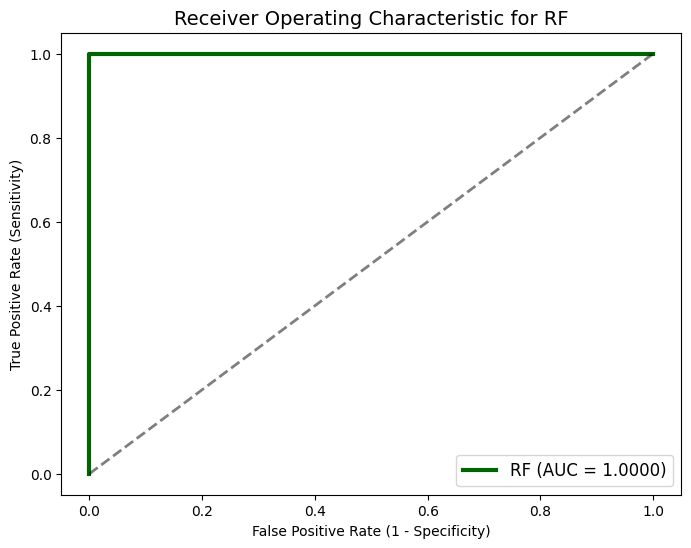

Confusion matrix of the model Bagging:
[[30  0]
 [ 1 49]]
True Negative of the model Bagging -> 30
False Positive of the model Bagging -> 0
False Negative of the model Bagging -> 1
True Positive of the model Bagging -> 49
Accuracy of the model Bagging -> 0.9875
Misclassification rate of the model Bagging -> 0.012499999999999956
Precision of the model Bagging -> 1.0
Recall of the model Bagging -> 0.98
F1 Measure of the model Bagging -> 0.98989898989899
Specificity of the model Bagging -> 1.0
MCC of the model Bagging -> 0.9738516810963534
AUC of the model Bagging -> 0.99
Precision-Recall AUC of the model Bagging -> 0.9924999999999999




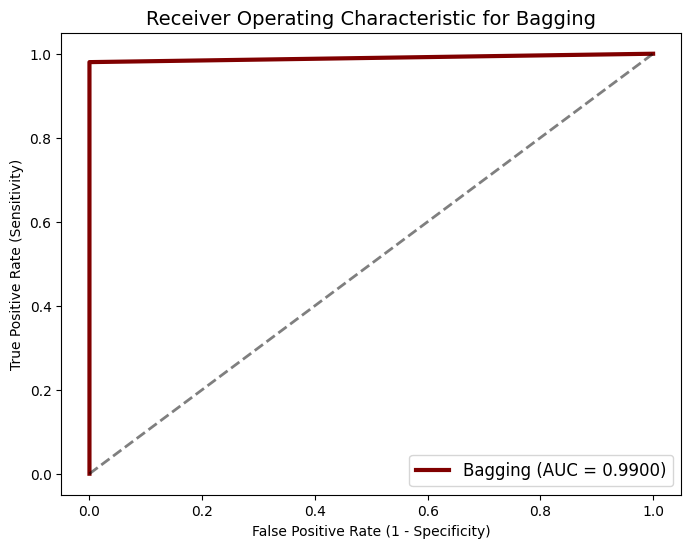

Confusion matrix of the model XGBoost:
[[30  0]
 [ 1 49]]
True Negative of the model XGBoost -> 30
False Positive of the model XGBoost -> 0
False Negative of the model XGBoost -> 1
True Positive of the model XGBoost -> 49
Accuracy of the model XGBoost -> 0.9875
Misclassification rate of the model XGBoost -> 0.012499999999999956
Precision of the model XGBoost -> 1.0
Recall of the model XGBoost -> 0.98
F1 Measure of the model XGBoost -> 0.98989898989899
Specificity of the model XGBoost -> 1.0
MCC of the model XGBoost -> 0.9738516810963534
AUC of the model XGBoost -> 1.0
Precision-Recall AUC of the model XGBoost -> 1.0




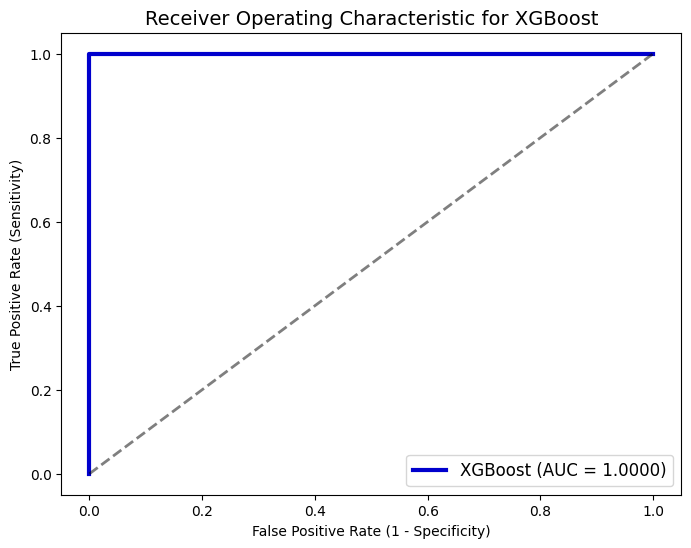

Confusion matrix of the model Adaboost:
[[30  0]
 [ 0 50]]
True Negative of the model Adaboost -> 30
False Positive of the model Adaboost -> 0
False Negative of the model Adaboost -> 0
True Positive of the model Adaboost -> 50
Accuracy of the model Adaboost -> 1.0
Misclassification rate of the model Adaboost -> 0.0
Precision of the model Adaboost -> 1.0
Recall of the model Adaboost -> 1.0
F1 Measure of the model Adaboost -> 1.0
Specificity of the model Adaboost -> 1.0
MCC of the model Adaboost -> 1.0
AUC of the model Adaboost -> 1.0
Precision-Recall AUC of the model Adaboost -> 1.0




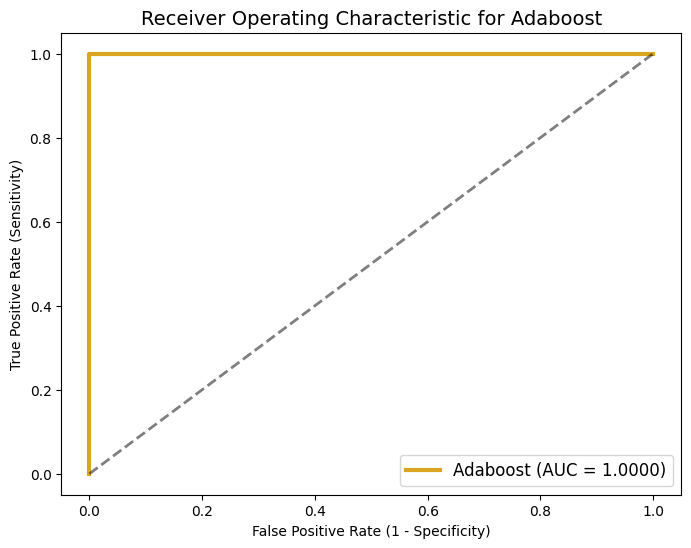

Confusion matrix of the model Catboost:
[[30  0]
 [ 0 50]]
True Negative of the model Catboost -> 30
False Positive of the model Catboost -> 0
False Negative of the model Catboost -> 0
True Positive of the model Catboost -> 50
Accuracy of the model Catboost -> 1.0
Misclassification rate of the model Catboost -> 0.0
Precision of the model Catboost -> 1.0
Recall of the model Catboost -> 1.0
F1 Measure of the model Catboost -> 1.0
Specificity of the model Catboost -> 1.0
MCC of the model Catboost -> 1.0
AUC of the model Catboost -> 1.0
Precision-Recall AUC of the model Catboost -> 1.0




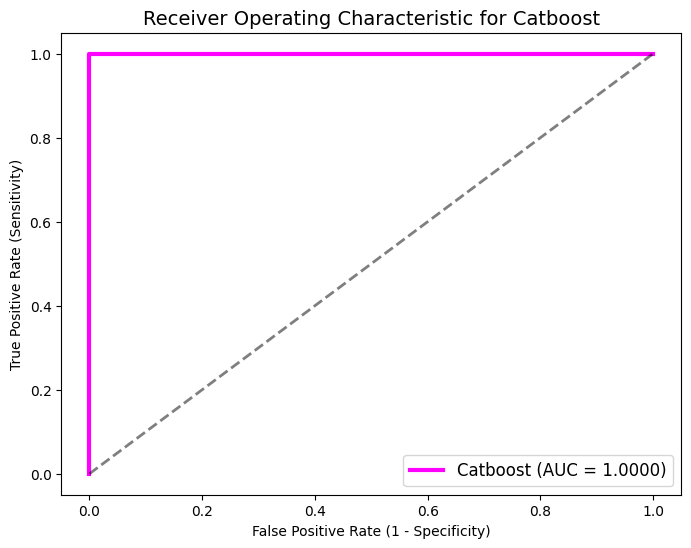

Confusion matrix of the model GradientBoost:
[[30  0]
 [ 0 50]]
True Negative of the model GradientBoost -> 30
False Positive of the model GradientBoost -> 0
False Negative of the model GradientBoost -> 0
True Positive of the model GradientBoost -> 50
Accuracy of the model GradientBoost -> 1.0
Misclassification rate of the model GradientBoost -> 0.0
Precision of the model GradientBoost -> 1.0
Recall of the model GradientBoost -> 1.0
F1 Measure of the model GradientBoost -> 1.0
Specificity of the model GradientBoost -> 1.0
MCC of the model GradientBoost -> 1.0
AUC of the model GradientBoost -> 1.0
Precision-Recall AUC of the model GradientBoost -> 1.0




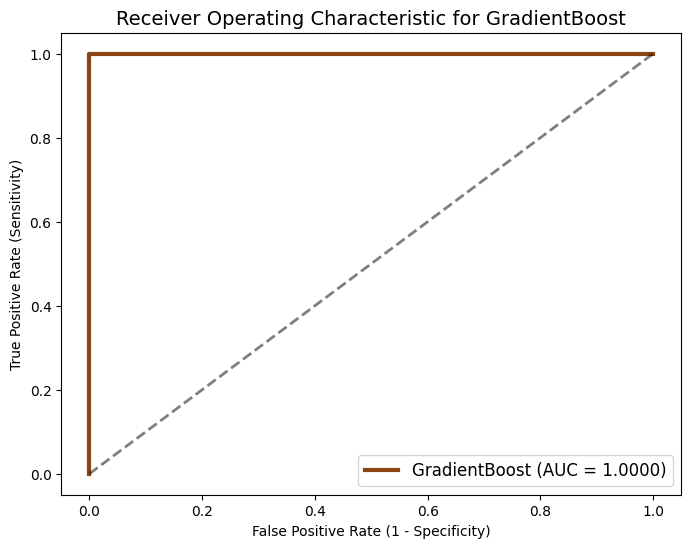

Confusion matrix of the model Stacking:
[[30  0]
 [ 0 50]]
True Negative of the model Stacking -> 30
False Positive of the model Stacking -> 0
False Negative of the model Stacking -> 0
True Positive of the model Stacking -> 50
Accuracy of the model Stacking -> 1.0
Misclassification rate of the model Stacking -> 0.0
Precision of the model Stacking -> 1.0
Recall of the model Stacking -> 1.0
F1 Measure of the model Stacking -> 1.0
Specificity of the model Stacking -> 1.0
MCC of the model Stacking -> 1.0
AUC of the model Stacking -> 1.0
Precision-Recall AUC of the model Stacking -> 1.0




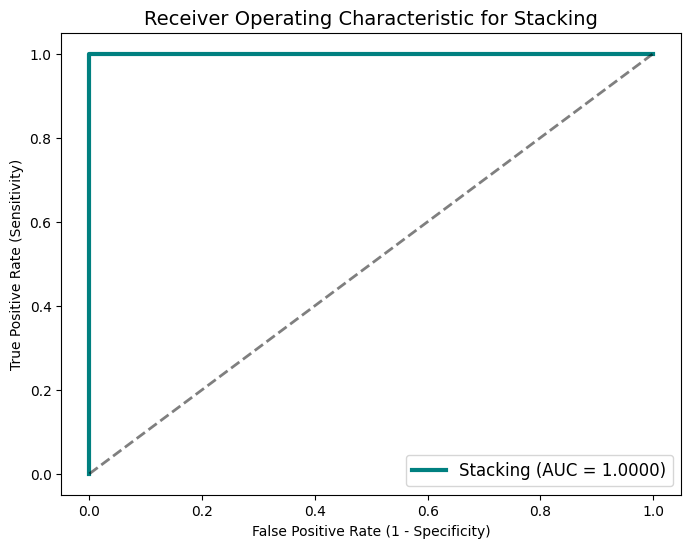

Confusion matrix of the model Voting Hard:
[[30  0]
 [ 1 49]]
True Negative of the model Voting Hard -> 30
False Positive of the model Voting Hard -> 0
False Negative of the model Voting Hard -> 1
True Positive of the model Voting Hard -> 49
Accuracy of the model Voting Hard -> 0.9875
Misclassification rate of the model Voting Hard -> 0.012499999999999956
Precision of the model Voting Hard -> 1.0
Recall of the model Voting Hard -> 0.98
F1 Measure of the model Voting Hard -> 0.98989898989899
Specificity of the model Voting Hard -> 1.0
MCC of the model Voting Hard -> 0.9738516810963534
AUC of the model Voting Hard -> 0.99
Precision-Recall AUC of the model Voting Hard -> 0.9924999999999999




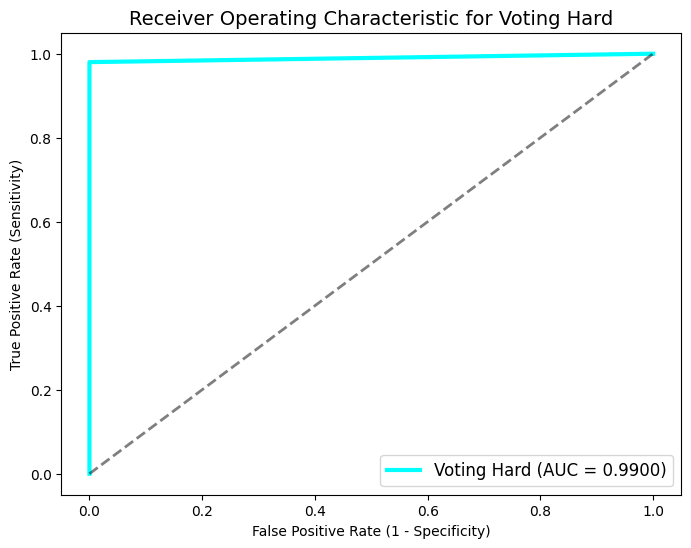

Confusion matrix of the model Voting Soft:
[[30  0]
 [ 0 50]]
True Negative of the model Voting Soft -> 30
False Positive of the model Voting Soft -> 0
False Negative of the model Voting Soft -> 0
True Positive of the model Voting Soft -> 50
Accuracy of the model Voting Soft -> 1.0
Misclassification rate of the model Voting Soft -> 0.0
Precision of the model Voting Soft -> 1.0
Recall of the model Voting Soft -> 1.0
F1 Measure of the model Voting Soft -> 1.0
Specificity of the model Voting Soft -> 1.0
MCC of the model Voting Soft -> 1.0
AUC of the model Voting Soft -> 1.0
Precision-Recall AUC of the model Voting Soft -> 1.0




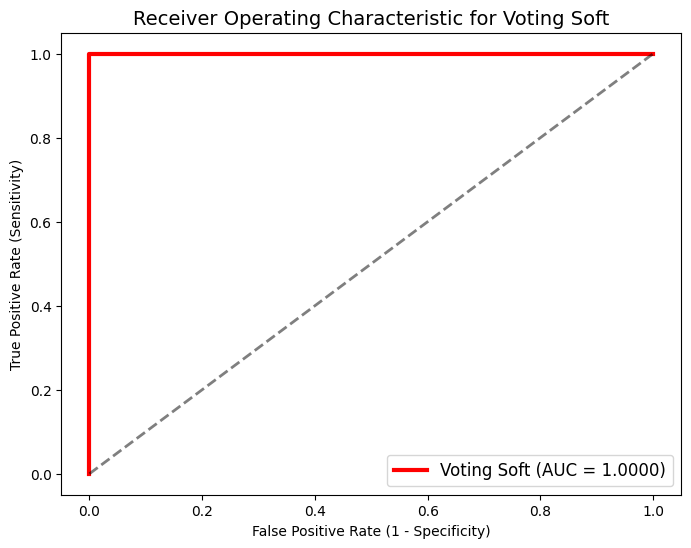

Confusion matrix of the model Blending:
[[30  0]
 [ 1 49]]
True Negative of the model Blending -> 30
False Positive of the model Blending -> 0
False Negative of the model Blending -> 1
True Positive of the model Blending -> 49
Accuracy of the model Blending -> 0.9875
Misclassification rate of the model Blending -> 0.012499999999999956
Precision of the model Blending -> 1.0
Recall of the model Blending -> 0.98
F1 Measure of the model Blending -> 0.98989898989899
Specificity of the model Blending -> 1.0
MCC of the model Blending -> 0.9738516810963534
AUC of the model Blending -> 0.9993333333333333
Precision-Recall AUC of the model Blending -> 0.9996078431372549




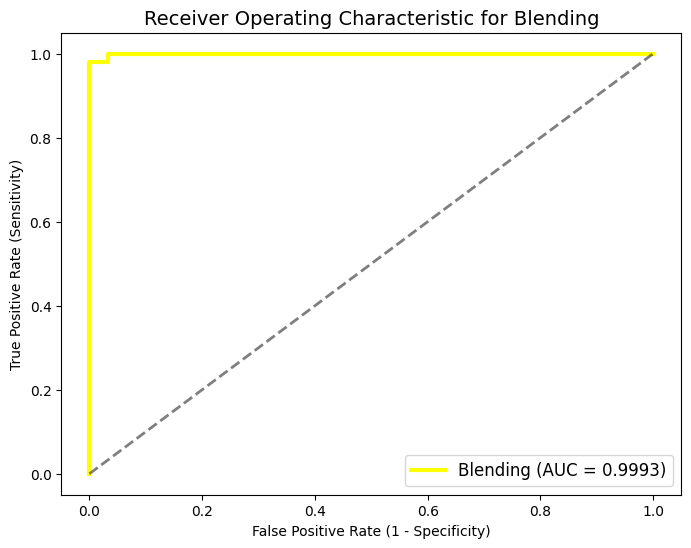

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Confusion matrix of the model ANN:
[[30  0]
 [ 1 49]]
True Negative of the model ANN -> 30
False Positive of the model ANN -> 0
False Negative of the model ANN -> 1
True Positive of the model ANN -> 49
Accuracy of the model ANN -> 0.9875
Misclassification rate of the model ANN -> 0.012499999999999956
Precision of the model ANN -> 1.0
Recall of the model ANN -> 0.98
F1 Measure of the model ANN -> 0.98989898989899
Specificity of the model ANN -> 1.0
MCC of the model ANN -> 0.9738516810963534
AUC of the model ANN -> 0.99
Precision-Recall AUC of the model ANN -> 0.9924999999999999




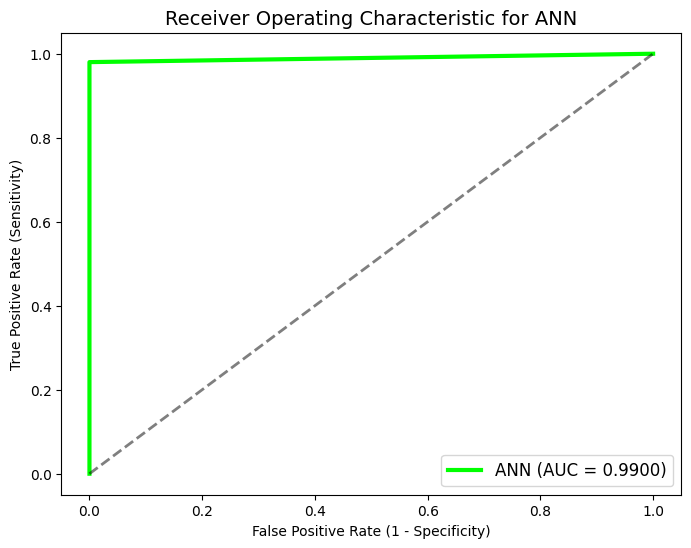

Confusion matrix of the model MLP:
[[30  0]
 [ 0 50]]
True Negative of the model MLP -> 30
False Positive of the model MLP -> 0
False Negative of the model MLP -> 0
True Positive of the model MLP -> 50
Accuracy of the model MLP -> 1.0
Misclassification rate of the model MLP -> 0.0
Precision of the model MLP -> 1.0
Recall of the model MLP -> 1.0
F1 Measure of the model MLP -> 1.0
Specificity of the model MLP -> 1.0
MCC of the model MLP -> 1.0
AUC of the model MLP -> 1.0
Precision-Recall AUC of the model MLP -> 1.0




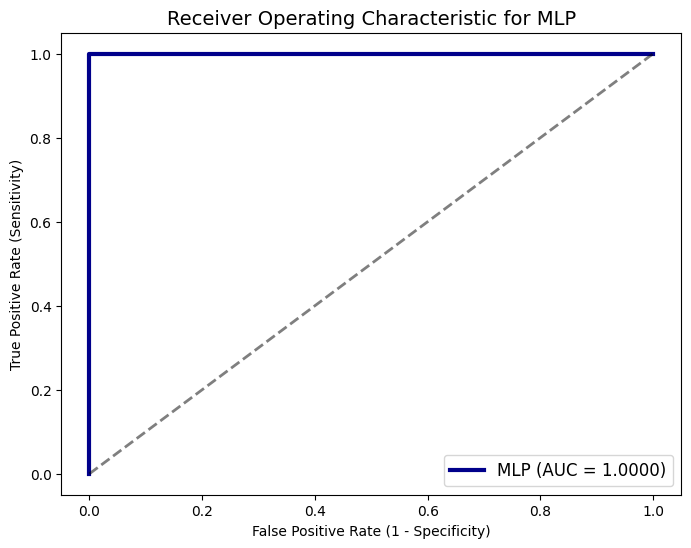

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Confusion matrix of the model SimpleRNN:
[[30  0]
 [ 1 49]]
True Negative of the model SimpleRNN -> 30
False Positive of the model SimpleRNN -> 0
False Negative of the model SimpleRNN -> 1
True Positive of the model SimpleRNN -> 49
Accuracy of the model SimpleRNN -> 0.9875
Misclassification rate of the model SimpleRNN -> 0.012499999999999956
Precision of the model SimpleRNN -> 1.0
Recall of the model SimpleRNN -> 0.98
F1 Measure of the model SimpleRNN -> 0.98989898989899
Specificity of the model SimpleRNN -> 1.0
MCC of the model SimpleRNN -> 0.9738516810963534
AUC of the model SimpleRNN -> 0.99
Precision-Recall AUC of the model SimpleRNN -> 0.9924999999999999




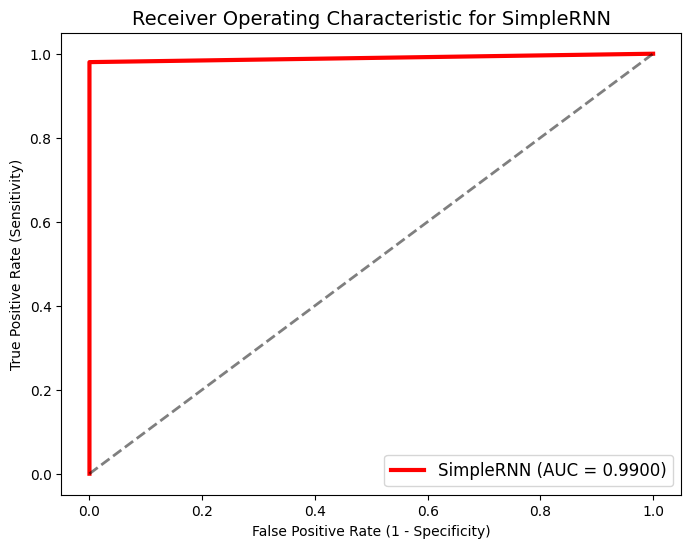

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000201882659D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Confusion matrix of the model LSTM:
[[30  0]
 [ 1 49]]
True Negative of the model LSTM -> 30
False Positive of the model LSTM -> 0
False Negative of the model LSTM -> 1
True Positive of the model L

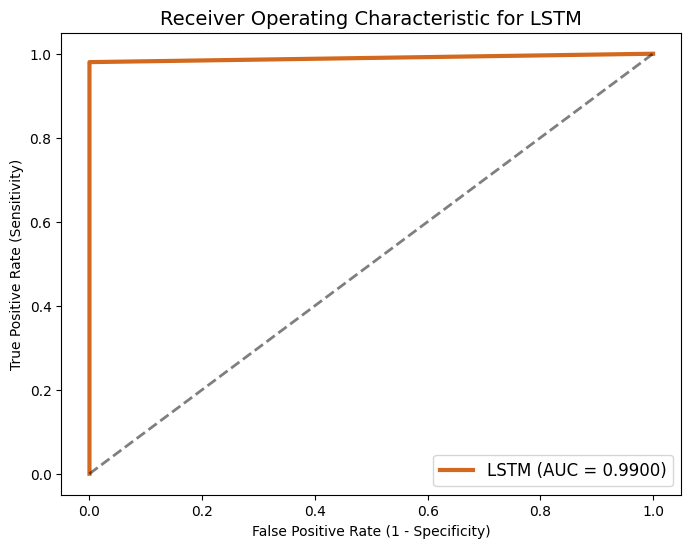

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
Confusion matrix of the model GRU:
[[30  0]
 [ 0 50]]
True Negative of the model GRU -> 30
False Positive of the model GRU -> 0
False Negative of the model GRU -> 0
True Positive of the model GRU -> 50
Accuracy of the model GRU -> 1.0
Misclassification rate of the model GRU -> 0.0
Precision of the model GRU -> 1.0
Recall of the model GRU -> 1.0
F1 Measure of the model GRU -> 1.0
Specificity of the model GRU -> 1.0
MCC of the model GRU -> 1.0
AUC of the model GRU -> 1.0
Precision-Recall AUC of the model GRU -> 1.0




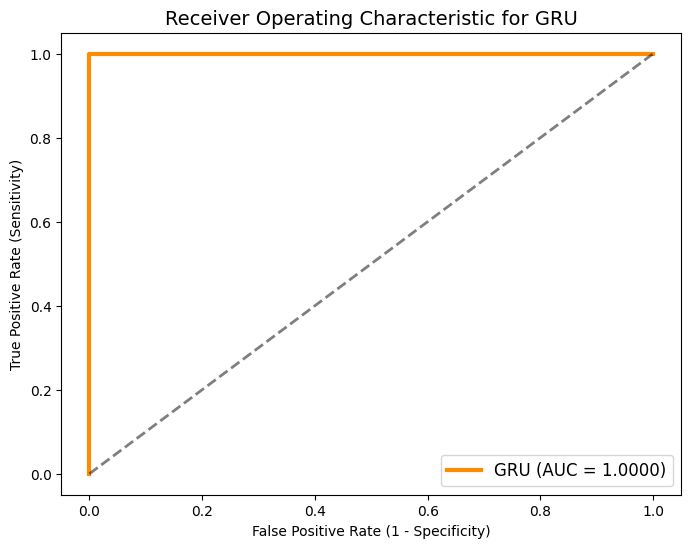

In [31]:
# Calculating the evaluation metrics on the trained models [Code in evaluation.py file]
roc_curves_data_em = evaluation.eval_function_with_roc_plot(em_models, em_names, lem_names, cem_names, test_data[Features], test_labels, meta_predictions, None)
roc_curves_data_dl = evaluation.eval_function_with_roc_plot(dl_models, dl_names, ldl_names, cdl_names, test_data[Features], test_labels, None, test_features)

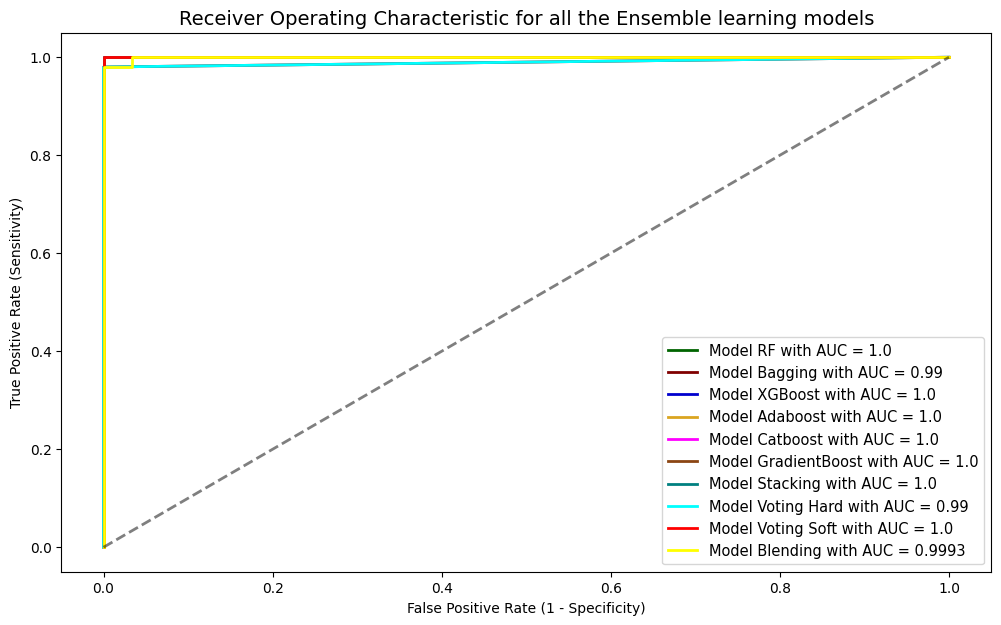

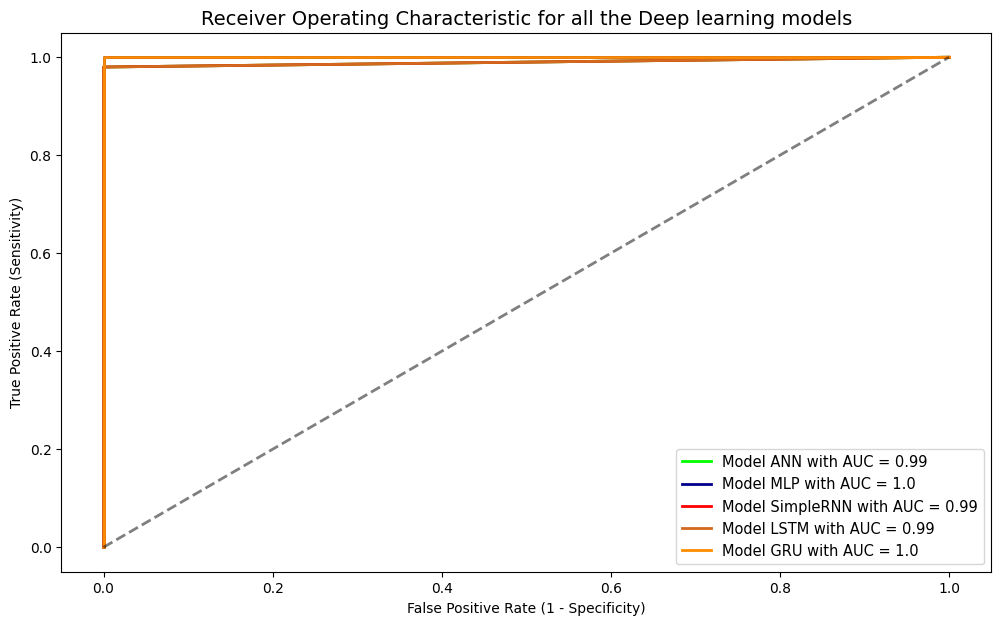

In [32]:
# Combined roc plot for the ensemble and deep learning trained models
evaluation.plot_roc_curves([roc_curves_data_em, roc_curves_data_dl], ["Ensemble", "Deep"])